In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline

from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import accuracy_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

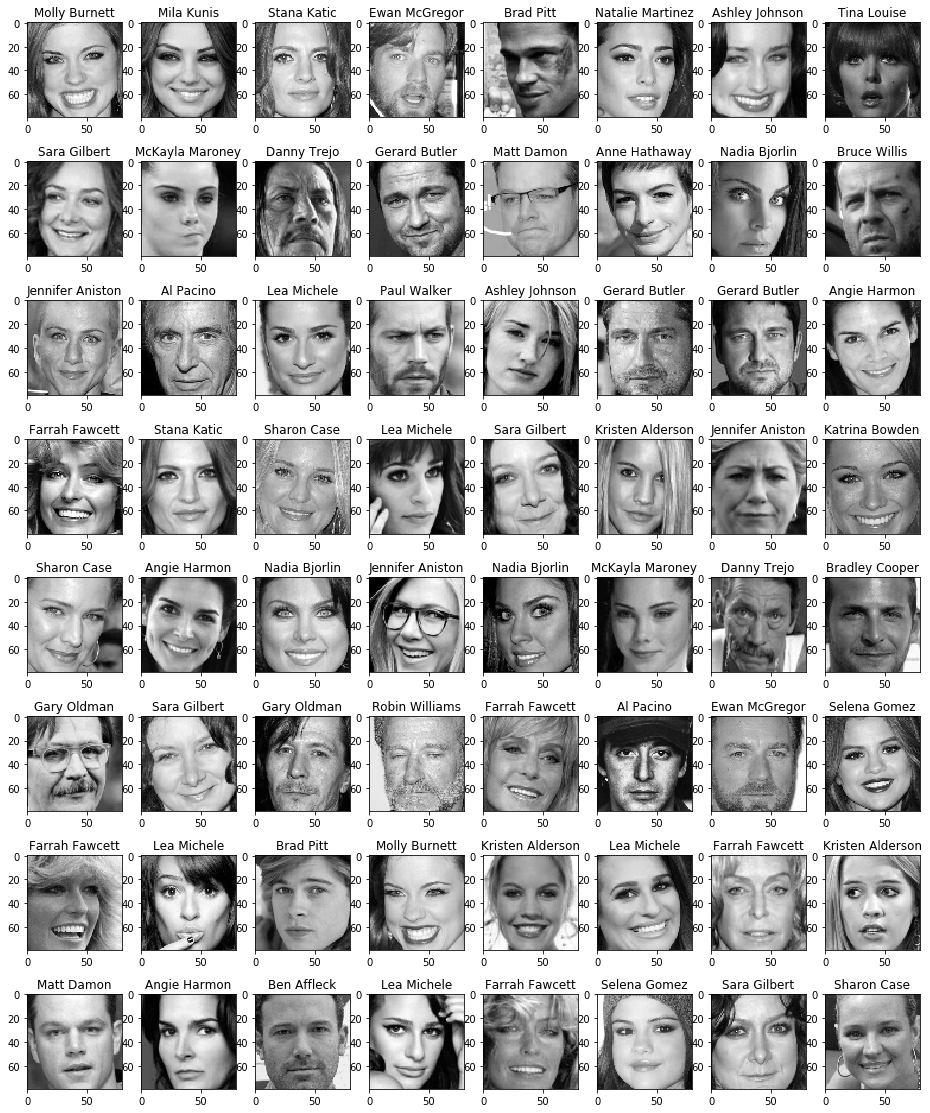

In [5]:
size = 80
shape =  2 * (size,)

X_train, y_train = shuffle(np.load('/Users/nikitos/P1/x_train.npy'), np.load('/Users/nikitos/P1/y_train.npy'))
X_test = np.load('/Users/nikitos/P1/test.npy')

width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, name) in enumerate(zip(X_train, y_train), 1):
    if n > width * height:
        break
        
    plt.subplot(height, width, n)
    plt.title(name)
    plt.imshow(image.reshape(shape), cmap='gray')

## Vanila kNN

In [6]:
skf = StratifiedKFold(n_splits=8, random_state=42)

In [82]:
neighbours = np.arange(1, 4, step=1)
scores = []
for n in tqdm_notebook(neighbours):
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance', p=2)
    scores.append(
        cross_val_score(knn, X_train, y_train, cv=skf, n_jobs=-1, scoring='accuracy').mean()
    )

A Jupyter Widget

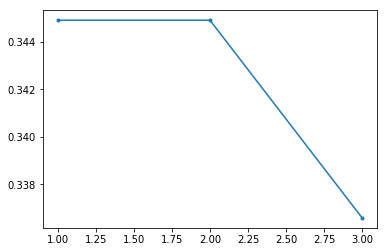

In [83]:
plt.plot(neighbours, scores, '.-')

In [84]:
cross_val_score(
    KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2), 
    X_train, y_train, cv=skf, n_jobs=-1, scoring='accuracy'
).mean()

0.34490101611402563

In [85]:
cross_val_score(
    KNeighborsClassifier(n_neighbors=1, weights='distance', p=1), 
    X_train, y_train, cv=skf, n_jobs=-1, scoring='accuracy'
).mean()

0.38573488692794222

In [77]:
scores = []
neighbours = [2, 3, 5, 7, 10]
for n in tqdm_notebook(neighbours):
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance', p=2)
    scores.append(
        cross_val_score(knn, X_train, y_train, cv=skf, n_jobs=-1, scoring='accuracy').mean()
    )

A Jupyter Widget

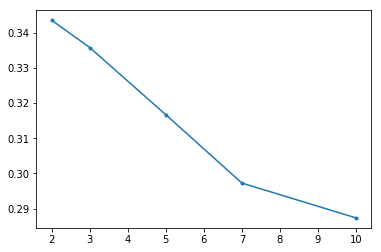

In [78]:
plt.plot(neighbours, scores, '.-')

In [7]:
pca = PCA(n_components=120)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
code_train = pca.transform(X_train)
code_test = pca.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, p=1)
knn.fit(code_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [11]:
cross_val_score(
    KNeighborsClassifier(n_neighbors=1, p=1), 
    code_train, y_train, cv=skf, n_jobs=-1, scoring='accuracy'
).mean()

0.38725727401303478

In [377]:
pd.DataFrame({
    'Id': 1 + np.arange(len(X_test)),
    'Name': knn.predict(X_test_pca),
}).to_csv('~/sub1.csv', index=False)

In [30]:
X_train[0].reshape(80, 80).shape

(80, 80)

# Image processing

Apparantely we don't anything (PCA, filters, etc) when we use HOG

In [13]:
from skimage import exposure, filters, feature

In [14]:
def hog(X):
    h = []
    for im in X.reshape(len(X), size, size):
        h.append(feature.hog(im, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(6, 6), block_norm='L1'))
    print("%d features created" % len(h[0]))
    return np.array(h).reshape(len(X), len(h[0]))

In [15]:
X_train_hog = hog(X_train)
X_test_hog = hog(X_test)

20736 features created
20736 features created


In [12]:
cross_val_score(
    KNeighborsClassifier(n_neighbors=1, p=1), 
    X_train_hog, y_train, cv=skf, n_jobs=-1, scoring='accuracy'
).min()

NameError: name 'X_train_hog' is not defined

In [16]:
knn = KNeighborsClassifier(n_neighbors=1, p=1)
knn.fit(X_train_hog, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [17]:
pd.DataFrame({
    'Id': 1 + np.arange(len(X_test)),
    'Name': knn.predict(X_test_hog),
}).to_csv('~/subHOG.csv', index=False)

---

In [40]:
# cross_val_score does this:
for train_indeces, val_indeces in tqdm_notebook(skf.split(X_train, y_train), total=skf.n_splits):
    knn.fit(X_train[train_indeces], y_train[train_indeces])
    print(accuracy_score(y_train[val_indeces], knn.predict(X_train[val_indeces])))

A Jupyter Widget

0.261838440111
0.247159090909
0.271137026239
0.202985074627
0.272171253823

